# Unsupervised Learning
#### © Explore Data Science Academy

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Honour Code
We JS7, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Import Libraries and Read In the Data
Do not modify or remove any of the code in these cells.

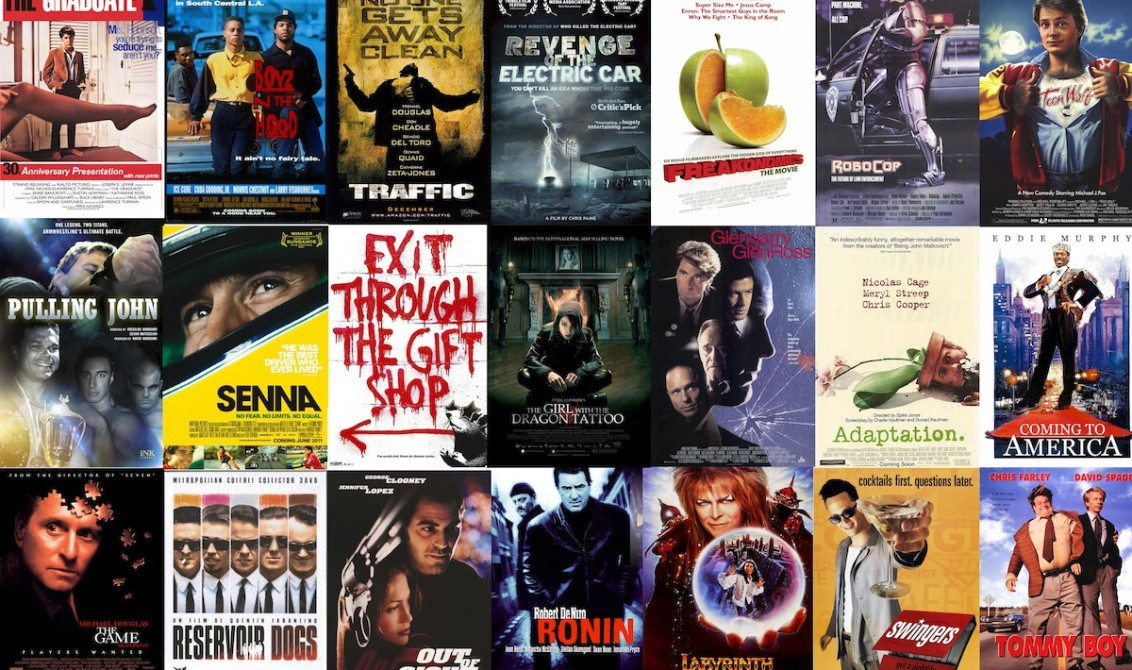

In [1]:
!pip install comet_ml

In [2]:
import comet_ml
from comet_ml import Experiment
# point comet_ml SDK to www.comet.com installation
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="qzNlWDPLH7GkOJCTFJvNbfuks",
    project_name="unsupervised-learning",
    workspace="sinethemba",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/sinethemba/unsupervised-learning/139e220fc8be41cbbf5e163e673631ee



# Importing Packages


In [3]:
# Import packages

# Data analysis libraries
import pandas as pd
import numpy as np
import scipy as sp
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Libraries to create models
from sklearn.model_selection import train_test_split as train_test_split_sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Save trained models
import pickle


import warnings
warnings.filterwarnings('ignore')

# Reading Data Sets


In [4]:
# import dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
imdb_df = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')

#### Inspect Loaded Data Sets 

In [5]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [6]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [7]:
genome_score.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [8]:


train_df.head()



,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [9]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [11]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [13]:
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [14]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [15]:


genome_score.head()



,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [16]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


## 1. Data Cleaning

#### Check Missing Values

Check for missing values

In [17]:
print(train_df.isnull().sum())
print(train_df.shape)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
(10000038, 4)


The train dataset has no missing values and has 10000038 values. Let's now check out the movies dataset.

In [18]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Look for duplicates or if there are any missing genres.

In [19]:
movies_df.loc[movies_df["title"].duplicated() == True]
duplicates = movies_df.duplicated(["title"])
print("Number of duplicate rows = "+str(duplicates.sum()))

Number of duplicate rows = 98


We will drop these duplicates later on. Now let's check which movies have no genres.

In [20]:
# check movies with missing genres
movies_df.loc[movies_df["genres"] == "(no genres listed)"].head()

,movieId,title,genres
15881,83773,Away with Words (San tiao ren) (1999),(no genres listed)
16060,84768,Glitterbug (1994),(no genres listed)
16351,86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
16491,87061,Trails (Veredas) (1978),(no genres listed)
17404,91246,Milky Way (Tejút) (2007),(no genres listed)


A total of 5062 movies in the dataframe have no genre listed. For simplicity purposes we will rename these to not_listed later on. Another thing that is quite unsettling is the way the movie titles are messy and contain articles after their release year. This leads us to the end of dataframe introspection and into the data cleaning.

#### Dropping columns

In [21]:
#The timestamp does not have any predicitive power and does not give us any usefull information. Knowing when the user gave a rating seems to have no effect. So we drop this column.
df = train_df.copy(deep=True)

In [22]:
df = df.iloc[:, :-1]


In [23]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


#### Drop Duplicates

At least 98 movie titles are duplicated in the movies database at least once. However, the movieId and titles are different. But since it's the same movie,the duplicates need to be deleted. Only keep the title with the most genres as this one has more information. Let us see the difference between the duplicated movies.

In [24]:
# check differences between first & second occurance of title in movies
movies_df.loc[movies_df["title"] == "The Plague (2006)"] 

,movieId,title,genres
27081,128255,The Plague (2006),Documentary|Horror|Thriller
61800,206925,The Plague (2006),Documentary


If we inspect random duplications we see that the first occourance of the movies title has more genres,so we are going to keep first occurance.

In [25]:
# Dropping duplicated movie titles
movies_df = movies_df.drop(
    movies_df.loc[movies_df["title"].duplicated(keep='first') == True].index)

In [26]:
#We then check to see if duplicates have all been removed.
movies_df.loc[movies_df["title"].duplicated(keep='first') == True].count()

movieId    0
title      0
genres     0
dtype: int64

 Now we see that the number of duplicates is zero.
<br>

`Number of duplicate rows = 0`

## Fix genre formats

In the case where the genre is `"(no genre listed)"` , movies to not_listed rename as `"Not_listed"` .This allows for easy manangement of genre column.

In [27]:
movies_df["genres"] = movies_df["genres"].str.replace(
    "(no genres listed)", "Not_listed", regex=False)
# change the separator between genres
movies_df["genres"] = movies_df["genres"].str.replace("|", " ", regex=False)

In [28]:
# Check movies_df
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


### Merge Datasets

Let's merge the datasets. For the purposes of this project we will only fix our focus on the `train_df` and the `movies_df`. Merge the two datasets. Although for the ratings predictions we will not need this dataframe, but when we make movie recommendations we will use it.

In [29]:
# Merge dataframes on common column
df_movie_info = pd.merge(train_df,movies_df,on = "movieId")

We will now create a movies_merge, a datframe that will combine both the movies and imdb dataframes into one that will be useful for the EDA section. This dataframe will contain a new column year, which is a year in which movies were made. In this dataframe, has all the currencies that are not US dollars dropped and the entire column changed to numerical values.

In [30]:
# merge movies_df and imdb_df on a common column ,i.e "movieId"
movies_merge = pd.merge(
    movies_df, imdb_df[['runtime', "movieId", 'budget', ]], on="movieId")
movies_merge['year'] = movies_merge['title'].str.split().str[-1]
movies_merge["year"] = movies_merge["year"].str.replace("(", "", regex=False)
movies_merge["year"] = movies_merge["year"].str.replace(")", "", regex=False)
movies_merge = movies_merge[~movies_merge['year'].str.contains(
    '[A-z]', na=False)]
movies_merge = movies_merge[~movies_merge['year'].str.contains(
    '[a-z]', na=False)]
movies_merge["year"] = movies_merge["year"].astype(float)
movies_merge1 = movies_merge.copy()
movies_merge = movies_merge.dropna()
movies_merge = movies_merge[movies_merge['budget'].str.startswith('$')]
movies_merge["budget"] = movies_merge["budget"].str.replace(
    "$", "", regex=False)
movies_merge["budget"] = movies_merge["budget"].str.replace(
    ",", "", regex=False)
movies_merge["budget"] = movies_merge["budget"].astype(float)

In [31]:
movies_merge.head(1)

,movieId,title,genres,runtime,budget,year
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,81.0,30000000.0,1995.0


## 2. Exploratory Data Analysis

### Basic statistics

In [32]:
#Before we dive in EDA, let's first do some basic summary statistics.
print("Summary of df:")
print("Number of unique movies = " + str(len(np.unique(df["movieId"]))))
print("Number of unique users = " + str(len(np.unique(df["userId"]))))
print("Total number of movie ratings = " + str(df.shape[0]))


Summary of df:
Number of unique movies = 48213
Number of unique users = 162541
Total number of movie ratings = 10000038


### User Behavior Analysis

In [33]:
no_of_rated_movies_per_user = df_movie_info.copy(deep=True)
no_of_rated_movies_per_user[
    'user_ratings'] = no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False)
no_of_rated_movies_per_user.groupby(
    by="userId")["rating"].count().sort_values(ascending=False)[:10]

userId
72315     12934
80974      3679
137293     3586
33844      3207
20055      3050
109731     2670
49403      2667
92046      2578
110971     2287
30879      2283
Name: rating, dtype: int64

User 72315 has rated the most movies. 12% of the ratings are from this user.Every user has rated a movie at some point ,with 6 users having only rated one movie. A possible reason why some users have fewer rating than either may be linked to how long they have been with the movie service .Users who have been using the service for a long time are most likely to have the most ratings because they have seem a lot of movies. Let's see if users actually give ratings for movies they liked or movies they did not like.

In [34]:
print("Summary of user ratings: ")
print("Highest number of ratings by single user in database = " + str(
    max(no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False))))

print("Lowest number of ratings by single user of in database = " + str(
    min(no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False))))

Summary of user ratings: 
Highest number of ratings by single user in database = 12934
Lowest number of ratings by single user of in database = 1


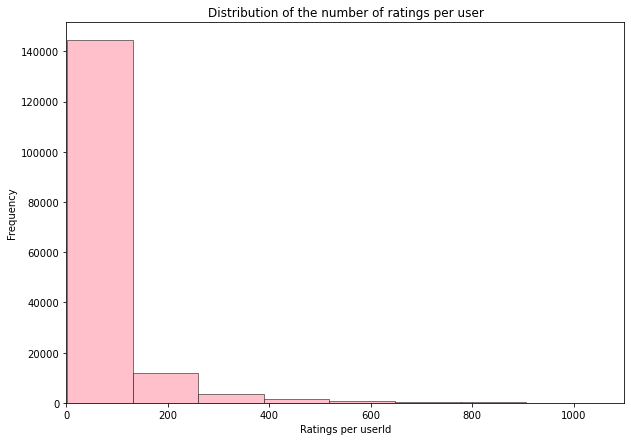

In [35]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of the number of ratings per user')
plt.xlabel('Ratings per userId')
plt.ylabel('Count')
plt.xlim(0, 1100)
no_of_rated_movies_per_user.groupby(
    by="userId")["rating"].count().plot.hist(
        bins=100, color='pink', edgecolor='black', linewidth=0.5)
experiment.log_figure(
    figure=plt, figure_name='Distribution of the number of ratings per user')
plt.grid(False)

plt.show()

## 3. Modeling

#### Basic Statistics

Before we look into EDA, let's first see do some basic summary statistics.

In [36]:
print("Summary of df:")
print("Number of unique movies = " + str(len(np.unique(df["movieId"]))))
print("Number of unique users = " + str(len(np.unique(df["userId"]))))
print("Total number of movie ratings = " + str(df.shape[0]))

Summary of df:
Number of unique movies = 48213
Number of unique users = 162541
Total number of movie ratings = 10000038


#### User Behavior Analysis

In [37]:

no_of_rated_movies_per_user = df_movie_info.copy(deep=True)
no_of_rated_movies_per_user[
    'user_ratings'] = no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False)
no_of_rated_movies_per_user.groupby(
    by="userId")["rating"].count().sort_values(ascending=False)[:10]

userId
72315     12934
80974      3679
137293     3586
33844      3207
20055      3050
109731     2670
49403      2667
92046      2578
110971     2287
30879      2283
Name: rating, dtype: int64

User `72315` has rated the most movies. 12% of the ratings are from this user.Every user has rated a movie at some point ,with 6 users having only rated one movie.
A possible reason why some users have fewer rating than either may be linked to how long they have been with the movie service .Users who have been using the service for a long time are most likely to have the most ratings because they  have seem a lot of movies.
Let's see if users actually give ratings for movies they liked or movies they did not like.

In [38]:
print("Summary of user ratings: ")
print("Highest number of ratings by single user in database = " + str(
    max(no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False))))

print("Lowest number of ratings by single user of in database = " + str(
    min(no_of_rated_movies_per_user.groupby(
        by="userId")["rating"].count().sort_values(ascending=False))))


Summary of user ratings: 
Highest number of ratings by single user in database = 12934
Lowest number of ratings by single user of in database = 1


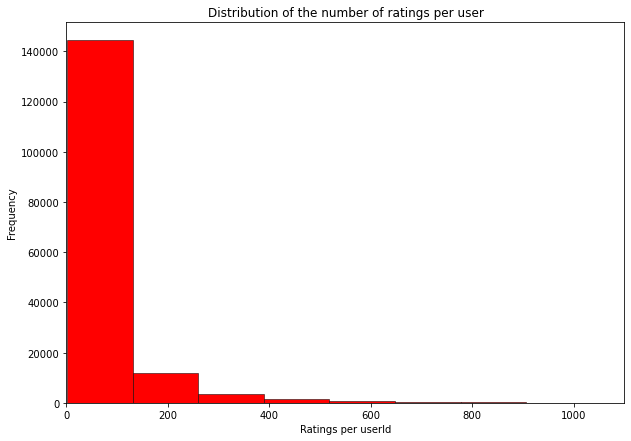

In [39]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of the number of ratings per user')
plt.xlabel('Ratings per userId')
plt.ylabel('Count')
plt.xlim(0, 1100)
no_of_rated_movies_per_user.groupby(
    by="userId")["rating"].count().plot.hist(
        bins=100, color='red', edgecolor='black', linewidth=0.5)
experiment.log_figure(
    figure=plt, figure_name='Distribution of the number of ratings per user')
plt.grid(False)

plt.show()

A lot of people find it time consuming to give ratings and they do not. As we can see that only a few users actually gave ratings. It is possible to have users who leave no ratings .In the case of new users ,they would not have had the opportunity to leave ratings. This is one of the biggest challenges in collaborative based recommender systems, `the cold start problem`, having to deal with a situation where a user does not give a rating, making it hard to make recommendations. The Cold start is a potential problem in computer-based information systems which involve a degree of automated data modelling. Specifically, it concerns the issue that the system cannot draw any inferences for users or items about which it has not yet gathered sufficient information.The more user actions an item has, the easier it is to tell which user would be interested in it and what other items are similar to it. As time progresses, the system will be able to give more and more accurate recommendations.

One way to address the cold start problem would be to give incentives to encourage users to leave ratings after a movie.Users are more likely to leave a rating if they are rewarded for it .For new users ,the alternative would be to always recommend the newest/most popular movies in the database.

#### Movie Rating Analysis

Now let's take a look at the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie.

In [40]:
# Analysis of ratings per movie
# view the avarage ratings per movie
ratings_per_movie = df_movie_info.groupby(
    by="title")["rating"].mean().sort_values(ascending=True)
ratings_per_movie.tail()  # top 5 movies!!!

title
Detective Conan: The Raven Chaser (2009)    5.0
Rockabilly Zombie Weekend (2013)            5.0
Sweaty Betty (2015)                         5.0
Robert Williams Mr. Bitchin' (2013)         5.0
Day the Universe Changed, The (1985)        5.0
Name: rating, dtype: float64

The movies have now been sorted from a movie with the highest ratigs to one with the lowest ratings. However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.We need to explore the number of ratings per movie.

In [41]:
df_movie_info.groupby('title')['rating'].count().sort_values(
    ascending=False)[:10]


title
Shawshank Redemption, The (1994)             32831
Forrest Gump (1994)                          32383
Pulp Fiction (1994)                          31697
Silence of the Lambs, The (1991)             29444
Matrix, The (1999)                           29014
Star Wars: Episode IV - A New Hope (1977)    27560
Jurassic Park (1993)                         25518
Schindler's List (1993)                      24004
Braveheart (1995)                            23722
Fight Club (1999)                            23536
Name: rating, dtype: int64

When we look at the number of ratings per movie ,the Most rated movie ,which is The Shawshank Redemption, did not come up top when looking at movies with the highest ratings .At 32831 total ratings ,This movie has an avarage rating of 4.4 .This is more represantative of how users feel in general about about the movie because it has been rated many times .It is important however to note that both the average rating per movie and the number of ratings per movie are important attributes .We can create a new dataframe that contains both of these attributes.

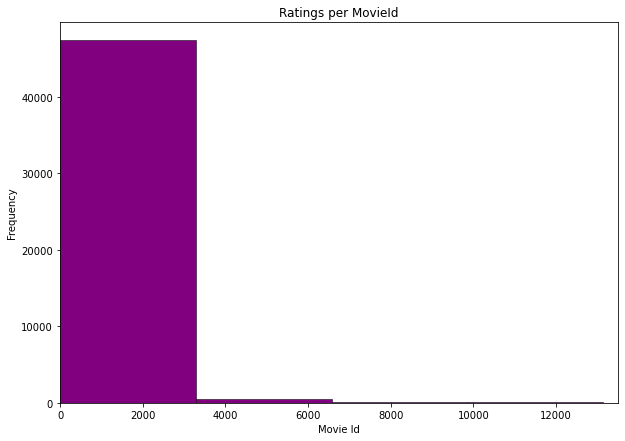

In [42]:
plt.figure(figsize=(10, 7))
plt.title('Ratings per MovieId')
plt.xlabel('Movie Id')
plt.ylabel('Count')
plt.xlim(0, 13500)
df_movie_info.groupby('title')['rating'].count().plot.hist(
    bins=10, color='purple', edgecolor='black', linewidth=0.5)
experiment.log_figure(figure=plt, figure_name='Ratings per Movie')
plt.show()

We have only a small portion of movies that got many ratings,these must be the most popular movies

In [43]:
# creating new dataframe where we can see movie title
# along with the average rating and number of ratings for the movie
ratings_mean_count = pd.DataFrame(
    df_movie_info.groupby('title')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(
    df_movie_info.groupby('title')['rating'].count())



In [44]:
ratings_mean_count.head()

,rating,rating_counts
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.753731,67
#1 Cheerleader Camp (2010),1.900000,5
#Female Pleasure (2018),4.000000,1
#FollowMe (2019),2.400000,5


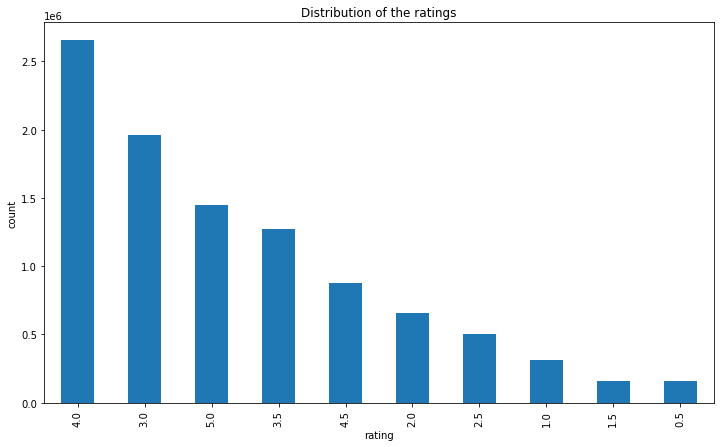

In [45]:
plt.figure(figsize=(12, 7))
df_movie_info['rating'].value_counts().plot(kind='bar',
                                            title='Distribution of the ratings')
plt.ylabel('count')
plt.xlabel('rating')
plt.rcParams['patch.force_edgecolor'] = True
experiment.log_figure(figure=plt, figure_name='Ratings per Movie')
plt.show()


The bar graph shows an indication that the ratings were positive. More than 60% of the ratings were above 3.5 which indicates that some users rate the movies that they have watched/seen as positive. However there is a clear indication from the count of ratings that most of the users do not leave a movie rating after watching which is a problem for the collaborative recommender system which gives rise to the cold start problem. It is a common tendency that users do not rate a movie mainly because they do not see the reason to rate which is one other problem that we will discuss as we go further in the notebook.

<AxesSubplot:title={'center':'Average ratings'}, xlabel='rating', ylabel='number of ratings'>

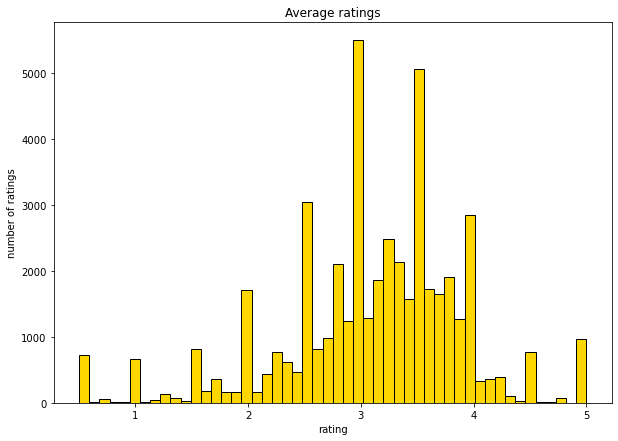

In [46]:
# histogram to visualize average ratings
plt.figure(figsize=(10, 7))
plt.xlabel("rating")
plt.ylabel("number of ratings")
plt.title("Average ratings")
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50, grid=False, color='gold')

rom the histogram ,we observe that the ratings have a weak normal distribution with the most ratings at at approximately 3. All the movies with a rating of 5.0 have been rated less than 1 000 times . The lowest rated movies have also been seen by very few people .There are a few outliers in the data.We can further explore the relationship between the number of ratings and the avarage ratings of a movie.This can be done by making a joint plot

<Figure size 576x432 with 0 Axes>

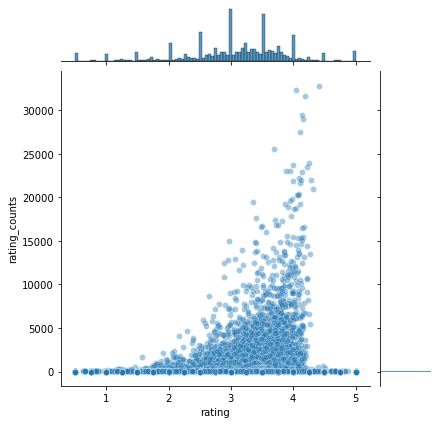

In [47]:
plt.figure(figsize=(8, 6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(
    x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

#### Genre Analysis

Let us look at the title and the genres for the Movies for the movies_df dataframe. We are going to look at the genres since the title was inspected in detail under the data cleaning section. We will have a look at all the genres contained in the movies and the number of their occurances.

In [48]:
# Create new dataframe to see the genres
genres = movies_df['genres'].str.replace("|", " ", regex=False)
genres = genres.str.replace("(no genres listed)", "Not_listed", regex=False)
genres_string = ' '.join(genres)
all_genres = genres_string.split()
# function to get unique genres ,to avoid repetation in dataframe


def unique_genres(genre_list):
    """The function inputs the genres of the movies and outputs all the unique genres 
    """
    # insert the list to the set
    list_set = set(genre_list)
    # convert the set to the list
    unique_list = (list(genre_list))
    return unique_list

all_genres = unique_genres(all_genres)
print("The number are " + str(
    len(set(all_genres))) + " unique movie genres in the dataframe")

The number are 20 unique movie genres in the dataframe


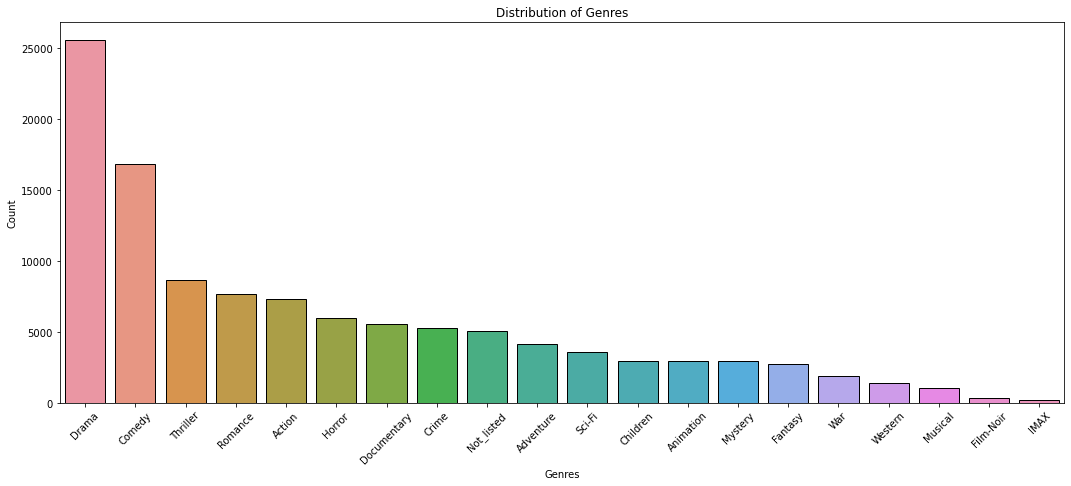

In [49]:
#Now that we have seen our genres we need to look at the number of films contained in each genre. This will also help in giving us insights on popularity of each genre

total_genresdf = pd.DataFrame(all_genres)
total_genresdf = total_genresdf[0].value_counts()
total_genresdf = pd.DataFrame(total_genresdf).reset_index()
total_genresdf['Genres'] = total_genresdf['index']
total_genresdf['Count'] = total_genresdf[0]
plt.figure(figsize=(18, 7))
plt.title('Distribution of Genres')
sns.barplot(x='Genres', y='Count', data=total_genresdf)
# Rotate the genres for better visualizations

plt.xticks(rotation=45)
experiment.log_figure(figure=plt, figure_name='Distribution of Genres')
plt.show()


The Drama genre has more movies than any other genre in the movies. This makes sense as this genre is about a representation of real life experiences, which you are most likely to find in movies. Comedy ,Romance and Thriller also appear to be common genre, supporting that most movies are about love and violence as seen in the title wordcloud. The next insight we want to draw is the trends in the share of genres of movies across the world. Has the demand for Sci-Fi movies declined? Do certain years have a disproportionate share of Horror Movies? Let us find out!

We will only be looking at the trends from the year 2000 and themes that are in the top 10 of most popular genres. Let us first look at the movie proportions per year and then the movie trends.

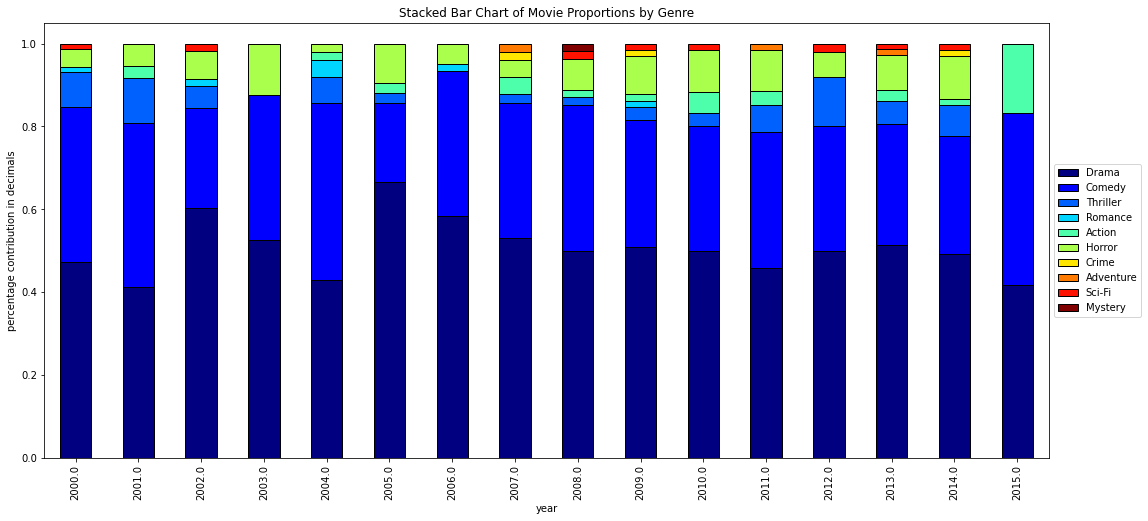

In [50]:
topgenres = [
    'Drama', 'Comedy', 'Thriller', 'Romance',
    'Action', 'Horror', 'Crime', 'Adventure', 'Sci-Fi', 'Mystery']
pop_gen_movies = movies_merge[(
    movies_merge['genres'].isin(topgenres)) & (
        movies_merge['year'] >= 2000) & (movies_merge['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genres']).apply(
    lambda x: x/x.sum(), axis=1)
ctab[topgenres].plot(
    kind='bar', stacked=True, colormap='jet', figsize=(18, 8)).legend(
        loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.ylabel("percentage contribution in decimals")
experiment.log_figure(
    figure=plt, figure_name='Stacked Bar Chart of Movie Proportions by Genre')
plt.show()

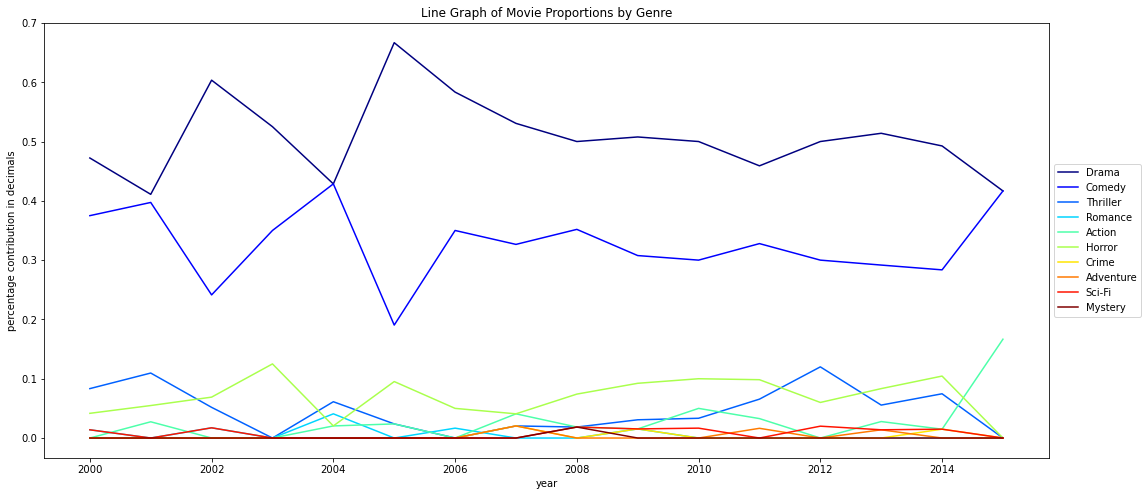

In [51]:
ctab[topgenres].plot(
    kind='line', stacked=False, colormap='jet', figsize=(18, 8)).legend(
        loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Line Graph of Movie Proportions by Genre')
plt.ylabel("percentage contribution in decimals")
experiment.log_figure(
    figure=plt, figure_name='Line Graph of Movie Proportions by Genre')
plt.show()

The proportion of movies of each genre has remained fairly constant since the beginning of this century except for Drama. The proportion of drama films have been falling since 2005 while other genres fluctuated a little.

We will now have a look at words commonly in movie titles.

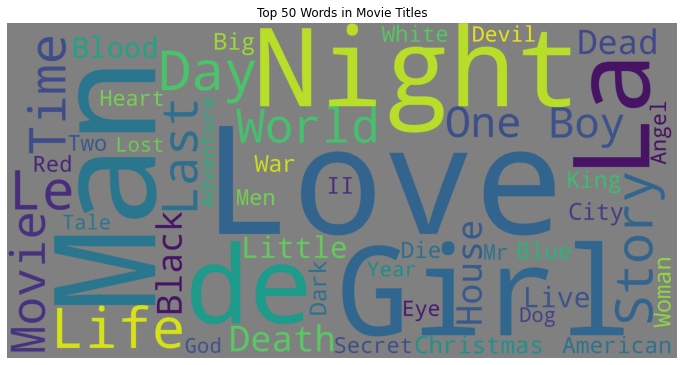

In [52]:

from wordcloud import WordCloud, STOPWORDS
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(
    stopwords=STOPWORDS, background_color='grey',
    height=2000, width=4000, max_words=50).generate(title_corpus)
plt.figure(figsize=(12, 8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title("Top 50 Words in Movie Titles")
experiment.log_figure(figure=plt, figure_name='Top 50 Words in Movie Titles')
plt.show()

Words like Love, Girl, Night, Man are the most commonly used words in movie titles. One can take from that that there is presence of romance in movies. Blood, War and Life are among the most occuring words, showing the presence of violence in the themes. This makes even more sense since Romance and Thriller or Horror were amongst the top genres.

#### Movie Run Time 

Movies have come a long way in terms of their run time. Earliest moving pictures had from 1 minute run time. We will now have look at movie run time to get some insights on the nature of movie lengths and how far they have come over time.

In [53]:
movies_runtime = pd.merge(
    movies_df, imdb_df[['runtime', "movieId", 'budget']], on="movieId")
movies_runtime['runtime'].describe()

count    13512.000000
mean       101.357460
std         29.861471
min          1.000000
25%         90.000000
50%         98.000000
75%        110.000000
max        877.000000
Name: runtime, dtype: float64

The average movie length is 1 hour and 41 minutes (101 minutes). It can be seen that the longest movie length is a shocking 14 hours.

Let us now plot a distribution of these movies.

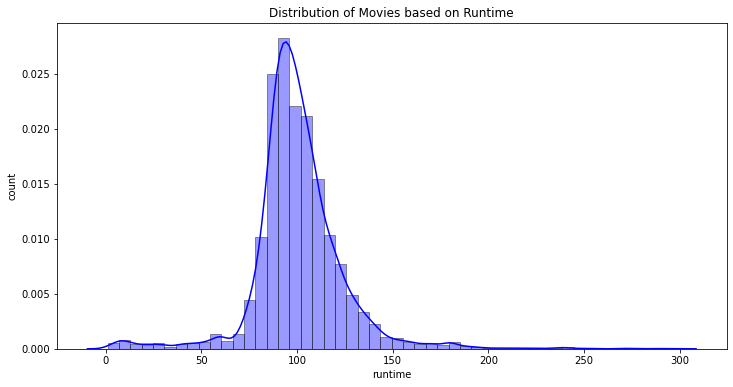

In [54]:
movies_runtime['runtime'] = movies_runtime['runtime'].astype('float')
plt.figure(figsize=(12, 6))
sns.distplot(movies_runtime[(movies_runtime['runtime'] < 300) & (
    movies_runtime['runtime'] > 0)]['runtime'], color='blue')
plt.ylabel("count")
plt.title('Distribution of Movies based on Runtime')
experiment.log_figure(
    figure=plt, figure_name='Distribution of Movies based on Runtime')
plt.show()

In [55]:
#Now we look at how the run time affects the budget
movies_budget = movies_runtime.dropna()
movies_budget["budget"] = movies_budget["budget"].str.replace(
    ",", "", regex=False)
movies_budget = movies_budget[movies_budget['budget'].str.startswith('$')]

movies_budget["budget"] = movies_budget["budget"].str.replace(
    "$", "", regex=False)
movies_budget["budget"] = movies_budget["budget"].str.replace(
    ",", "", regex=False)
movies_budget["budget"] = movies_budget["budget"].astype(float)
df_mat = movies_budget[(movies_budget['budget'].notnull()) & (
    movies_budget['runtime'] > 0)]

In [56]:
movies_budget.head()

,movieId,title,genres,runtime,budget
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,81.0,30000000.0
1,2,Jumanji (1995),Adventure Children Fantasy,104.0,65000000.0
2,3,Grumpier Old Men (1995),Comedy Romance,101.0,25000000.0
3,4,Waiting to Exhale (1995),Comedy Drama Romance,124.0,16000000.0
4,5,Father of the Bride Part II (1995),Comedy,106.0,30000000.0


<Figure size 864x432 with 0 Axes>

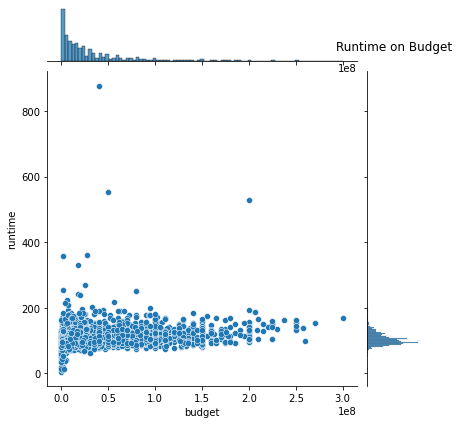

In [57]:
plt.figure(figsize=(12, 6))
sns.jointplot('budget', 'runtime', data=df_mat)
plt.title('Runtime on Budget\n')
experiment.log_figure(figure=plt, figure_name='Runtime on Budget')
plt.show()

The run time and budget have a much weaker correlation than we had expected. This makes sense if one looks at it this way; the grenre has a greater impact on the budget of the movie. A two hour documentary will cost significantly lesser than a one hour Sci-Fi movie.

Next, we would like to see the average lengths of movies through time. It would be interesting to see the trends in what filmmakers adjudged would be the appropriate length of a movie at that time.

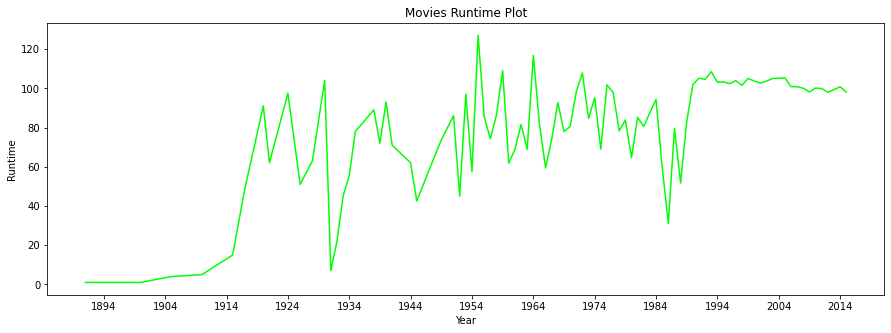

In [58]:
plt.figure(figsize=(15, 5))
year_runtime = movies_merge1.dropna(
    axis=0, subset=['runtime']).groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime, color='lime')
plt.xticks(np.arange(1894, 2015, 10))
plt.xlabel('Year')
plt.ylabel('Runtime')
plt.title('Movies Runtime Plot')
experiment.log_figure(figure=plt, figure_name='Movies Runtime Plot')
plt.show()


We notice that movies started around 1 minute duration and started going for up to over 100 minutes after 1990 . From 1994 movies started ranging from 100 to 110 minutes and remained there.

In [59]:
#Let us now see the longest and the shortest movies of all time (with respect to the data we are working with).
movies_merge1[movies_merge1['runtime'] > 0][[
    'runtime', 'title', 'year']].sort_values('runtime').head(10)


,runtime,title,year
15584,1.0,"Pyramid of Triboulet, The (La pyramide de Trib...",1899.0
15579,1.0,Four Heads Are Better Than One (Un homme de tê...,1898.0
23826,1.0,Stille Nacht I: Dramolet (1988),1988.0
22650,1.0,The Kiss (1900),1900.0
23790,1.0,Santa Claus (1898),1898.0
24594,1.0,Dickson Greeting (1891),1891.0
22629,2.0,The Menacing Eye (1960),1960.0
23772,2.0,Curb Dance (2010),2010.0
23148,2.0,Fresh Guacamole (2012),2012.0
23771,3.0,Syrinx (1966),1966.0


We see that every movie in this list with an exception of Curb the Dance and Fresh Gaucamole were filmed in the late 1890s and the beginning of the 20th century. These movies range from 1 to 3 minutes in duration.

In [60]:
#Let us look at the movies with the longest length.
movies_merge[movies_merge['runtime'] > 0][[
    'runtime', 'title', 'year']].sort_values(
        'runtime', ascending=False).head(10)

,runtime,title,year
23518,877.0,Taken (2002),2002.0
12717,552.0,Into the West (2005),2005.0
23931,530.0,The Pacific (2010),2010.0
16684,360.0,Comanche Moon (2008),2008.0
10267,359.0,No Direction Home: Bob Dylan (2005),2005.0
15463,330.0,Carlos (2010),2010.0
3942,271.0,Gettysburg (1993),1993.0
11253,255.0,When the Levees Broke: A Requiem in Four Acts ...,2006.0
12804,250.0,Dinotopia (2002),2002.0
1373,242.0,Hamlet (1996),1996.0


Although this list of of films that were relased in later 90s and early 2000s, we can see their duration is too long to be for a single movie. Films like these are mostly made in seasons and episodes and therefore once cannnot compare them with the table of the shortest films.

#### Movie Budget

Budget is expected to be skewed. We also know that budget is influenced by inflation and making it difficult to do comparisons. However, it would be interesting to gather as much insights as possible from this quantity as budget is often a critical feature in predicting movie revenue and success. Let us first start by gathering the summary statistics for our budget.

In [61]:
movies_budget['budget'].describe()

count    5.511000e+03
mean     2.871092e+07
std      3.673731e+07
min      0.000000e+00
25%      5.000000e+06
50%      1.550000e+07
75%      3.700000e+07
max      3.000000e+08
Name: budget, dtype: float64

The mean budget of a film is 29 million US dollars whereas the median budget is far smaller at 15 million US dollars. This strongly suggests the mean being influenced by outliers.

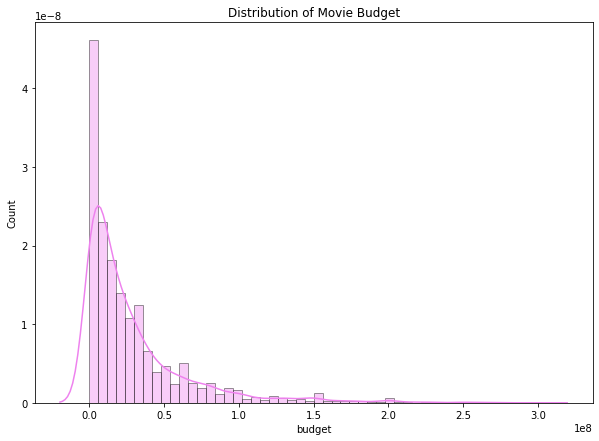

In [62]:
plt.figure(figsize=(10, 7))
plt.title('Distribution of Movie Budget')
plt.ylabel('Count')
sns.distplot(
    movies_budget[movies_budget['budget'].notnull()]['budget'], color='violet')
experiment.log_figure(figure=plt, figure_name='Distribution of Movie Budget')
plt.show()

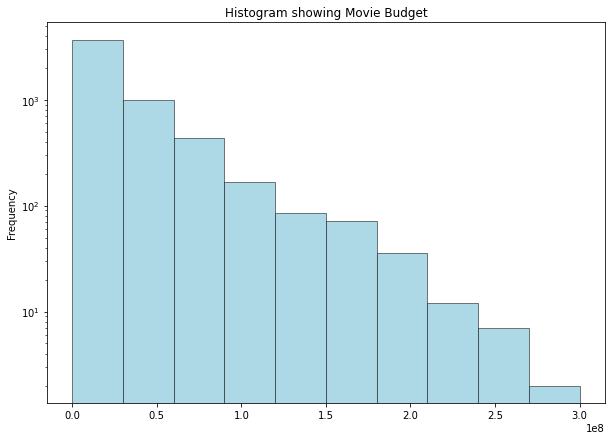

In [63]:
plt.figure(figsize=(10, 7))
plt.title('Histogram showing Movie Budget')
plt.ylabel('Count')
movies_budget['budget'].plot(
    logy=True, kind='hist', color='lightblue',
    edgecolor='black', linewidth=0.5)
experiment.log_figure(figure=plt, figure_name='Histogram showing Movie Budget')
plt.show()

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 37 million dollars. Next, let us take a look at the most expensive movies of all time.

In [64]:
movies_merge[movies_merge['budget'].notnull()][[
    'budget', 'title', 'year']].sort_values('budget', ascending=False).head(10)


,budget,title,year
11582,300000000.0,Pirates of the Caribbean: At World's End (2007),2007.0
10870,270000000.0,Superman Returns (2006),2006.0
15470,260000000.0,Tangled (2010),2010.0
11537,258000000.0,Spider-Man 3 (2007),2007.0
13470,250000000.0,Harry Potter and the Half-Blood Prince (2009),2009.0
17354,250000000.0,"Dark Knight Rises, The (2012)",2012.0
17753,250000000.0,John Carter (2012),2012.0
16356,250000000.0,Pirates of the Caribbean: On Stranger Tides (2...,2011.0
22785,250000000.0,The Hobbit: The Battle of the Five Armies (2014),2014.0
14050,237000000.0,Avatar (2009),2009.0


Pirates of the Caribbean: At World's End and Superman Returns films occupy the top spots in this list with a staggering budget of over 300 million dollars. It is also noticeable that none of these movies in the top 10 are from the 21th century.

# Modeling

### Recommender Systems

A Recommender System uses statistical techniques to try and predict user's ratings for an item depending on similarities between the items or similarities between the user's who have previously rated the items. 
<br>


**Types of Recommender Systems**<br>

* **Content-based Filtering** : This method suggests similar items based a particular item. It uses metadata such as genre,description,actors,tags,directors, authors,etc to make recommendations. It works based on **implict** reations (viewing an item, adding it to a wish list, the time spent watching a movie, and metadata we mentioned). For example  if a person likes a particular item, he or she will also like an item that is similar to it.<br>
![](https://github.com/Clarencia/unsupervised-predict-streamlit-template/blob/master/images/content.PNG?raw=true)
* **Collaborative Filtering** : This method attempt to predict the rating or preference that a would would give an item based on previous ratings or preferences of other users. It works based on **explict** reactions (rating on a scale of 1-5, likes or dislikes). For example,say, a number of users gave the same ratings to movies X and Y. A new user comes who gave the same rating to movie X but hasn't watched movie Y yet will be recommended the movie Y. <br>
![](https://github.com/Clarencia/unsupervised-predict-streamlit-template/blob/master/images/colab.PNG?raw=true) 
**Types of algorithms in the family of collaborative filtering:**
   * **Memory based** collaborative filtering uses user rating data to compute the similarity between users or items.There are two main types of memory based methods, namely the user-based filtering and the item-based filtering
     * User-based filtering: it is a technique that is used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user.
     * Item-based filtering: it is a technique used to filter based on the similarity between items calculated using people's ratings of those items.
   * **Model based** collaborative filtering utilizes several machine learning algorithms to train on the vector of items for a specific user, then they can build a model that can predict the user’s rating for a new item that has just been added to the system. Listed below are some of the algorithms used for model based recommender systems:
       * Bayesian Networks
       * Singular Value Decomposition (SVD)
       * Clustering algorithms
       * Probabilistic Latent Semantic Analysis

Ealier we spoke about the `cold-start problem`. The **cold-start problem** happens when new users or new items arrive in an e-commerce platform. It causes an issue of the system not being able to draw any inferences for users or items which it has not yet gathered sufficient information on.
<br>

**Content-based filtering rarely suffers from the cold start problem compared to collaborative filtering.**

#### Recommender Systems for movie ratings

To build our recommender system, we will use python's scikit library known as `surprise`. [Surprise](http://surpriselib.com/#:~:text=Surprise%20is%20a%20Python%20scikit,perfect%20control%20over%20their%20experiments.) is a Python scikit building and analyzing recommender systems that deal with explicit rating data. This allows us to use collaborative filtering. Due to space limitations we are not going to use content based filterting fot ratings predictions but for movie predictions. Let us look at the advantages and disadvantages of collaborative filtering before we start with implementing the algorithm.
<br>

**Advantages of Collaborative Filtering**:<br>
   * The system only needs the feedback matrix to train a matrix factorization model. In particular, the system doesn't need contextual features. 
   * The model can help users discover new interests. In isolation, the Machine Learning model may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.
<br>   

**Disadvantages of Collaborative Filtering**:<br>
   * The matrix used for collaborative filtering could be extremely large and sparse, which     brings about the challenges in the performances of the recommendation.
   * Cold start problem.

With limitations of computational time, we first compare the rmse for different models. The model that performs the best will be the one we use to get the predictions. The surprise has basic algorithms, k-NN algorithms and Matrix Factorization-based algorithms. Only a portion of these algorithms we will use for the purposes of this project. We are going to try out the following algorithms:
<br>

* **Singular Vector Decomposition (SDV)** <br>
    `SVD` is an algorithm that is equivalent to [Probabilistic Matrix Factorization](http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf).  SVD gives you the whole full view of diagonalizing a matrix into special matrices that are easy to manipulate and to analyze. It lay down the foundation to untangle data into independent components. We will not go deeper with the mathematics behind, it is out of our scope. 
    
* **Non-Negative Matrix Factorization(NMF)**<br>
    `NMF` is a collaborative filtering algorithm that is similar to SVD. This algorithm finds two non-negative matrices and the product of two matrices approximates the non-negative X. The factorization applied here can be used as an example for dimensionality reduction.

* **BaselineOnly**<br>
    `BaselineOnly` is an algorithm predicts the baseline estimate for given user and item. It is one of the basic algorithms. Basic models do not do much work but we still need them as they are useful when we want to compare accuracies. 
    
Note that these algorithms rely on intense mathematical techniques. More about these algorithms can be found on the suprise package information page.
    

#### Cross Validation 

The `cross_validate()` function runs a cross-validation procedure according to the cv argument, and computes some accuracy measures.<br>

To know which algorithm will perform best, we first check the cross validate results, to save us time and space from training all algorithms.In this section we choose the best algorithm. Let's assess the cross_validate results for the models. We are looking for an algorithm with the lowest `test rmse`.

First let us read in our data.

In [65]:
conda install -c conda-forge scikit-surprise

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [66]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader

In [67]:
# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')



In [68]:
# Instantiate the reader object
reader = Reader()
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

#### SVD

`cross_validate(algorithm_svd, data, measures=['RMSE'], cv=3, verbose=False)`
<br>

`{'test_rmse': array([0.84548699, 0.84660084, 0.845991  ]),
 'fit_time': (881.7942757606506, 889.0900523662567, 885.4885053634644),
 'test_time': (121.4857976436615, 126.40761017799377, 137.64266920089722)}`

#### Baseline Performance 

`bsl_options = {'method': 'als', 'n_epochs': 5,'reg_u': 12,'reg_i': 5}
cross_validate(BaselineOnly(bsl_options=bsl_options), data, measures=['RMSE'], cv=3, verbose=False)`

`{'test_rmse': array([0.86745023, 0.86732325, 0.86822369]),
 'fit_time': (18.905017614364624, 22.70960807800293, 23.073598861694336),
 'test_time': (59.38574409484863, 60.329806327819824, 64.02023839950562)}`

#### NMF Performance 

`cross_validate(NMF(), data, measures=['RMSE'], cv=3, verbose=False)`
<br>

`{'test_rmse': array([0.88901116, 0.88867021, 0.88883018]),
 'fit_time': (988.345846414566, 961.9062538146973, 988.6009919643402),
 'test_time': (92.31729197502136, 76.45683908462524, 90.96124601364136)}`

#### SVD Performance 

`cross_validate(algorithm_svd, data, measures=['RMSE'], cv=3, verbose=False)`
<br>

`{'test_rmse': array([0.84548699, 0.84660084, 0.845991  ]),
 'fit_time': (881.7942757606506, 889.0900523662567, 885.4885053634644),
 'test_time': (121.4857976436615, 126.40761017799377, 137.64266920089722)}`

### Evaluation of Algorithm 

####  Summary of RMSE's for Algorithms

In [69]:
algorithms = ['SVD', 'BaselineOnly', 'NMF']
rmse_scores = [0.84548699, 0.86745023, 0.88901116]
pd.DataFrame(rmse_scores, algorithms, columns=['RMSE'])

,RMSE
SVD,0.845487
BaselineOnly,0.867450
NMF,0.889011


Above when, we did the cross validation,the SVD did better and we decided to tune it to get even better performance. The tuned SVD, `SVD(lr_all=009,n_factors=20)` performed the best as it gave the lowest `rmse` score. It is of no surprise that the SVD did well since it is a matrix factorization algorithm, which means it breaks down a large matrix into a product of smaller ones thus untangling the data, in a sense that we extract useful information in this haystack of large data.

#### Fit the best Algorithm 

Our best algorithm, the `SVD(lr_all=0.009,n_factors=20)`, gave the lowest `test rmse` hence we only test and get predictions only for that algorithm.
<br>

**WARNING : This might take hours to run!!!**

In [70]:
def svd(train, k):
    utilMat = np.array(train)
     # the nan or unavailable entries are masked
    mask = np.isnan(utilMat)
    masked_arr = np.ma.masked_array(utilMat, mask)
    item_means = np.mean(masked_arr, axis=0)
    # nan entries will replaced by the average rating for each item
    utilMat = masked_arr.filled(item_means)
    x = np.tile(item_means, (utilMat.shape[0],1))
   
    # we remove the per item average from all entries.
    # the above mentioned nan entries will be essentially zero now
    utilMat = utilMat - x
    # The magic happens here. U and V are user and item features
    U, s, V=np.linalg.svd(utilMat, full_matrices=False)
    s=np.diag(s)
    # we take only the k most significant features
    s=s[0:k,0:k]
    U=U[:,0:k]
    V=V[0:k,:]
    s_root=sqrtm(s)
    Usk=np.dot(U,s_root)
    skV=np.dot(s_root,V)
    UsV = np.dot(Usk, skV)
    UsV = UsV + x
    print("svd done")
    return UsV

In [71]:
from surprise import AlgoBase
from surprise import Dataset
from surprise.model_selection import cross_validate


class MyOwnAlgorithm(AlgoBase):

    def __init__(self):

        # Always call base method before doing anything.
        AlgoBase.__init__(self)

    def estimate(self, u, i):

        return 3


data = Dataset.load_builtin('ml-100k')
algo = MyOwnAlgorithm()

cross_validate(algo, data, verbose=True)

Evaluating RMSE, MAE of algorithm MyOwnAlgorithm on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2377  1.2497  1.2445  1.2419  1.2467  1.2441  0.0041  
MAE (testset)     0.9944  1.0090  1.0056  0.9965  1.0028  1.0017  0.0055  
Fit time          0.00    0.05    0.05    0.07    0.05    0.04    0.02    
Test time         0.11    0.10    0.11    0.09    0.09    0.10    0.01    


{'test_rmse': array([1.23773988, 1.24973997, 1.24452802, 1.24193398, 1.24671569]),
 'test_mae': array([0.9944 , 1.00895, 1.00565, 0.9965 , 1.0028 ]),
 'fit_time': (0.0,
  0.05343461036682129,
  0.04689311981201172,
  0.06700396537780762,
  0.050487518310546875),
 'test_time': (0.11396956443786621,
  0.10177230834960938,
  0.11228585243225098,
  0.09475564956665039,
  0.09267401695251465)}

In [72]:
# Define the algorithm
algorithm_svd_tuned = SVD(lr_all=0.009, n_factors=20)

# Build the trainset
trainset = data.build_full_trainset()

# Fit the model
algorithm_svd_tuned.fit(trainset)

In [73]:
def get_predictions(algorithm):
    """
    The functions makes predictions of ratings
    to match them with the user_movie ids.

    Parameters
    -----------
    model : fitted model
    Returns
    -------
    Pandas Dataframe :
        dataframe with user_movie ids and ratings
    """
    # Create a new list to add predictions.
    # Iterate over the test_df, select user and movie.
    # Predict ratings using the algo.predict() method.
    # Append the predictions to the p list.
    X = test_df[['userId', 'movieId']]
    p = []
    for k in range(len(test_df)):
        user = X.iloc[k][0]
        movie = X.iloc[k][1]
        predicted = algorithm.predict(user, movie).est
        p.append(predicted)

    predictions = [round(num, 3) for num in p]

    # Create dataframe for the ratings.
    # Create dataframe for the user_movie ids.
    # Concatenate the two dataframes.
    rate = np.array(predictions)
    rating = pd.DataFrame(rate, columns=['rating'])

    Idd = np.array([str(x)+"_"+str(y) for x, y in test_df[[
        'userId', 'movieId']].values]).reshape(-1, 1)
    Id = pd.DataFrame(Idd, columns=['Id'])

    data_df = pd.concat([Id, rating], axis=1)

    return data_df


In [74]:
from surprise import SVD,NormalPredictor
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)
params = gs.best_params['rmse']
svdtuned = SVD(n_factors=params['n_factors'], n_epochs=params['n_epochs'],lr_all=params['lr_all'], reg_all=params['reg_all'])

In [78]:
predicted = get_predictions(algorithm_svd_tuned)
predicted.head()

,Id,rating
0,1_2011,3.53
1,1_4144,3.53
2,1_5767,3.53
3,1_6711,3.53
4,1_7318,3.53


In [ ]:
predicted.to_csv("/kaggle/working/final_sub.csv", index=False)

# <a id='the_movie'></a>
## 10. Recommender system for movie recommendation

In this section, as already mentioned in the previous section, we will use both filtering methods to recommend movies. A good defination of what `Content Based Filtering` is has been given in the section before this. Here, however we will look into the **advantages** and **disadvantages** of content based filtering as well as some of the short comings of the recommender system.

**Types of alogrithms in the content based filtering family**:
* **Pearson correlation**: Similarity between two users (and their attributes, such as articles read from a collection of blogs) can be accurately calculated with the `Pearson correlation`. The alogrothm measures the linear dependance between two variables as a function of their attributes. The shotfall of this alogrithm however is that it does not calculate this measure over the entire population base.
* **Clustering alogrithms**: The alogrithm works by  identifying similarities among items, such as blog readers, by calculating their distance from other items in a `feature space`. The number of independent features defines the dimensionality of the space. If items are "close" together, they can be joined in a ` cluster`. A family of other clustering alogrithms that can be used in content based filtering includes **k-means**, **Adoptive Resonance Theory(ART)**, **Expectation-Maximization**.

**Advantages of Content Based Filtering**
* The model `doesn't need any data about other users`, since the recommendations are specific to this user. This makes it `easier to scale` to a `large number of users`.
* The model can `capture the specific interests of a user`, and can `recommend niche items` that very few other users are interested in.

**Disadvantages of Content Based Filtering**
* Since the `feature representation of the items are hand-engineered to some extent`, this technique requires a `lot of domain knowledge`. Therefore, the model can only be as good as the hand-engineered features.
* The model can only make `recommendations based on existing interests of the user`. In other words, the model has limited ability to expand on the users' existing interests.
<br>

Now let us use some content based filtering to recommend similar movies to a given user.

### Recommendations using collaborative based filtering
We create a fuction that uses collaborative based filtering to recommend movies.

In [79]:
train_df = train_df[:2700]  # Subset of train_df to see comparison


def collab_model(movie_list, top_n=10):
    """Performs Collaborative filtering based upon a list of movies supplied
       by the app user.

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Select features to use and create a utility matrix
    rate = pd.merge(train_df[[
        'userId', 'movieId', 'rating']], movies_df[[
            'title', "movieId"]], on="movieId")
    util_matrix = rate.pivot_table(
        index=['title'], columns=['userId'], values='rating')

    # Normalize each row (a given user's ratings) of the utility matrix
    util_matrix_norm = util_matrix.apply(
        lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

    # Fill Nan values with 0's, transpose matrix, drop users with no ratings
    util_matrix_norm.fillna(0, inplace=True)
    util_matrix_norm = util_matrix_norm.T
    util_matrix_norm = util_matrix_norm.loc[:, (
        util_matrix_norm != 0).any(axis=0)]

    # Save the utility matrix in scipy's sparse matrix format
    util_matrix_sparse = sp.sparse.csr_matrix(util_matrix_norm.values)

    # Compute the similarity matrix using the cosine similarity metric
    movie_similarity = cosine_similarity(util_matrix_sparse.T)

    # Save the matrix as a dataframe to allow for easier indexing
    movie_sim_df = pd.DataFrame(
        movie_similarity, index=util_matrix_norm.columns,
        columns=util_matrix_norm.columns)

    # select movie 1
    if movie_list[0] not in movie_sim_df.columns:
        movie1 = pd.DataFrame()
    else:
        movie1 = pd.DataFrame(movie_sim_df[movie_list[0]])
        movie1 = movie1.reset_index()
        movie1['similarity'] = movie1[movie_list[0]]
        movie1 = pd.DataFrame(movie1, columns=['title', 'similarity'])

    # select movie 2
    if movie_list[1] not in movie_sim_df.columns:
        movie2 = pd.DataFrame()
    else:
        movie2 = pd.DataFrame(movie_sim_df[movie_list[1]])
        movie2 = movie2.reset_index()
        movie2['similarity'] = movie2[movie_list[1]]
        movie2 = pd.DataFrame(movie2, columns=['title', 'similarity'])

    # select movie 3
    if movie_list[2] not in movie_sim_df.columns:
        movie3 = pd.DataFrame()
    else:
        movie3 = pd.DataFrame(movie_sim_df[movie_list[2]])
        movie3 = movie3.reset_index()
        movie3['similarity'] = movie3[movie_list[2]]
        movie3 = pd.DataFrame(movie3, columns=['title', 'similarity'])

    finalmovies = pd.concat([movie1, movie2, movie3])
    if finalmovies.empty:
        reco = rate.groupby(
            'title').mean().sort_values(
                by='rating', ascending=False).index[:10].to_list()
        recommended_movies = random.sample(reco, top_n)
    else:
        recommended_movies = finalmovies.sort_values(
            'similarity', ascending=False)
        recommended_movies = recommended_movies[~(
            recommended_movies['title'].isin(movie_list))]
        recommended_movies = list(recommended_movies[0:top_n]['title'])

        return recommended_movies


# Recommendations using content based filtering

Now we create three fuctions using content based filtering to recomment movies. The first one will suggest movies based on grenres, the second one based on plot ,cast and directors, and the last one based on movie titles.

In [80]:
def content_model(movie_list, top_n=10):
    """Performs content filtering based upon a list of movies supplied
       by the app user.Recommendation based on movie genres

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    # Take subset of database
    df = movies_df[:27000]
    df['genres'] = df['genres'].str.replace('|', ' ')
    # Transforms text to feature vectors that can be used as input to estimator
    tf = TfidfVectorizer(
        analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
    tfidf_matrix = tf.fit_transform(df['genres'])
    tfidf_matrix.shape

    # Compute cosine similarity between samples
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    df = df.reset_index()
    df = df.drop('index', axis=1)
    titles = df['title']
    indices = pd.Series(df.index, index=df['title'])

    # first movie
    idx1 = indices[movie_list[0]]
    sim_scores1 = list(enumerate(cosine_sim[idx1]))
    sim_scores1 = sorted(sim_scores1, key=lambda x: x[1], reverse=True)
    sim_scores1 = sim_scores1[0:5]

    # second movie
    idx2 = indices[movie_list[1]]
    sim_scores2 = list(enumerate(cosine_sim[idx2]))
    sim_scores2 = sorted(sim_scores2, key=lambda x: x[1], reverse=True)
    sim_scores2 = sim_scores2[0:5]

    # third movie
    idx3 = indices[movie_list[2]]
    sim_scores3 = list(enumerate(cosine_sim[idx3]))
    sim_scores3 = sorted(sim_scores3, key=lambda x: x[1], reverse=True)
    sim_scores3 = sim_scores3[0:5]

    mix = sim_scores3+sim_scores2+sim_scores1
    mix = sorted(mix, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in mix]
    recc = (titles.iloc[movie_indices])
    recc = [elem for elem in recc if elem not in movie_list]
    return recc[0:top_n]



In [81]:
def content_model1(movie_list, top_n=10):
    """Performs content filtering based upon a list of movies supplied
       by the app user.Recommendation will
       be based on mixture of movie properties

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    df = movies_df[:27000]
    imdb_df = imdb_df = pd.read_csv(
        '/kaggle/input/edsa-recommender-system-predict/imdb_data.csv')
    imdb_df['title_cast'] = imdb_df['title_cast'].str.replace('|', ' ')
    imdb_df['plot_keywords'] = imdb_df['plot_keywords'].str.replace('|', ' ')
    imdb_df = imdb_df.drop(['budget'], axis=1)

    # Create soup of movie properties
    # Soup of Plotkyeowrds ,cast ,director and genres
    imdb_df['movie_attributes'] = imdb_df[
        'title_cast'] + imdb_df['plot_keywords'] + imdb_df['director']
    attributes_df = pd.merge(df, imdb_df, on='movieId')
    attributes_df['attributes'] = attributes_df[
        'movie_attributes'] + attributes_df['genres']
    attributes_df = attributes_df.drop([
        'title_cast', 'title_cast', 'director',
        'plot_keywords', 'movie_attributes'], axis=1)
    # fill null values with the value of genre
    attributes_df['attributes'] = attributes_df[
        'attributes'].fillna(attributes_df['genres'])

    # Transforms text to feature vectors that can be used as input to estimator
    tf = TfidfVectorizer(
        analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
    tfidf_matrix1 = tf.fit_transform(attributes_df['attributes'])
    cosine_sim1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)
    tfidf_matrix1.shape
    cosine_sim1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)
    attributes_df = attributes_df.reset_index()
    attributes_df = attributes_df.drop('index', axis=1)
    indices1 = pd.Series(attributes_df.index, index=attributes_df['title'])
    titles = attributes_df['title']

    # first movie
    idx1 = indices1[movie_list[0]]
    sim_scores1 = list(enumerate(cosine_sim1[idx1]))
    sim_scores1 = sorted(sim_scores1, key=lambda x: x[1], reverse=True)
    sim_scores1 = sim_scores1[0:5]

    # second movie
    idx2 = indices1[movie_list[1]]
    sim_scores2 = list(enumerate(cosine_sim1[idx2]))
    sim_scores2 = sorted(sim_scores2, key=lambda x: x[1], reverse=True)
    sim_scores2 = sim_scores2[0:5]

    # third movie
    idx3 = indices1[movie_list[2]]
    sim_scores3 = list(enumerate(cosine_sim1[idx3]))
    sim_scores3 = sorted(sim_scores3, key=lambda x: x[1], reverse=True)
    sim_scores3 = sim_scores3[0:5]

    mix = sim_scores3+sim_scores2+sim_scores1
    mix = sorted(mix, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in mix]
    recc = (titles.iloc[movie_indices])
    recc = [elem for elem in recc if elem not in movie_list]
    return recc[0:top_n]

In [82]:
def content_model2(movie_list, top_n=10):
    """Performs content filtering based upon a list of movies supplied
       by the app user.Recommdendation based on movie titles

    Parameters
    ----------
    movie_list : list (str)
        Favorite movies chosen by the app user.
    top_n : type
        Number of top recommendations to return to the user.

    Returns
    -------
    list (str)
        Titles of the top-n movie recommendations to the user.

    """
    df = movies_df[:27000]
    # df['genres'] = df['genres'].str.replace('|', ' ')
    tf = TfidfVectorizer(
        analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
    tfidf_matrix2 = tf.fit_transform(df['title'])
    tfidf_matrix2.shape
    cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)
    df = df.reset_index()
    df = df.drop('index', axis=1)
    titles = df['title']
    indices2 = pd.Series(df.index, index=df['title'])

    # first movie
    idx1 = indices2[movie_list[0]]
    sim_scores1 = list(enumerate(cosine_sim2[idx1]))
    sim_scores1 = sorted(sim_scores1, key=lambda x: x[1], reverse=True)
    sim_scores1 = sim_scores1[0:5]

    # second movie
    idx2 = indices2[movie_list[1]]
    sim_scores2 = list(enumerate(cosine_sim2[idx2]))
    sim_scores2 = sorted(sim_scores2, key=lambda x: x[1], reverse=True)
    sim_scores2 = sim_scores2[0:5]

    # third movie
    idx3 = indices2[movie_list[2]]
    sim_scores3 = list(enumerate(cosine_sim2[idx3]))
    sim_scores3 = sorted(sim_scores3, key=lambda x: x[1], reverse=True)
    sim_scores3 = sim_scores3[0:5]

    mix = sim_scores3+sim_scores2+sim_scores1
    mix = sorted(mix, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in mix]
    recc = (titles.iloc[movie_indices])
    recc = [elem for elem in recc if elem not in movie_list]
    return recc[0:top_n]


In [84]:
movie_list = ['Toy Story (1995)', 'In Bruges (2008)', 'Lost, The (2009)']

**Side by side comparison of suggested movies**
Given a list of movies i.e `Toy Story (1995),In Bruges (2008), Lost, The (2009)`
Here we can observe how the movie suggestions using collaborative filtering and content based filtering differ even though they were based on the same three movies.
![](https://github.com/Clarencia/unsupervised-predict-streamlit-template/blob/READme/resources/imgs/Movie_suggestions.png?raw=true)

In the content based model, because one of the movie in the movie list is `Toy story (1995)`,some of the top ten recommended movies include `Toy Story 2 (1999)` and `Toy Story 3 (2010)` ,which are part of the same movie series .This is a good result result because there will be a continuation of the toy story for the user .They most likely are curious to see whay happens next in the story .This result also shows that the recommender recognises that they movies had the same cast and a very similar plot.

For collaborative based filtering ,two users are considered similar if they have watched the same movie and have rated it the same (e.g if they both hated it).This information is then used to make the recommendation ,to say if you as user A have liked the same same 10 movies as user B ,then you will most likely like this list of 10 movies that user B has rated highly

### Save Model

In [85]:
model = algorithm_svd_tuned
model_save = "model.pkl"
with open(model_save, 'wb') as file:
    pickle.dump(model, file)


In [86]:
# Log the best algorithm.
experiment.log_model('SVD_tuned', model_save)

# Log the best hyperparameters
experiment.log_parameters({'lr_all': 0.009, 'n_factors': 20})

# Log the best rmse
experiment.log_metric('RMSE', 0.81303)

## 4. Kaggle Submission 

In [87]:

    
predicted.to_csv("/kaggle/working/final_sub.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/final_sub.csv'

In [88]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/sinethemba/unsupervised-learning/139e220fc8be41cbbf5e163e673631ee
COMET INFO:   Metrics:
COMET INFO:     RMSE : 0.81303
COMET INFO:   Parameters:
COMET INFO:     lr_all    : 0.009
COMET INFO:     n_factors : 20
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 13
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (10.98 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     model-element            : 1 (3.06 MB)
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1
COMET

In [ ]:

#Create a dictionary of model names and RMSE scors
eval_dict = {
        "Model": ['LinearRegression'],
        "RMSE": [RMSE_1]
    }
# Create a DataFrame from the dictionary
            eval_df = pd.DataFrame(eval_dict)
        # Sort the Dataframe in ascending RMSE score
            eval_df.sort_values('RMSE',ascending=True)